In [1]:
import pandas as pd
import os
import numpy as np

In [12]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [2]:
files = pd.DataFrame()

for filename in os.listdir("tickerData"):
    if filename.endswith(".txt"):
        x = pd.read_csv("tickerData/"+filename)
        x.columns = [y.replace(" ", "") for y in x.columns]
        x['TICKER'] = filename[:-4]
        files = pd.concat([files,x], ignore_index=True)
        

In [3]:
files

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO,TICKER
0,19900101,1.0000,1.0000,1.0000,1.0000,1.000000e+11,0.0,0.0,0.0,0.0,CASH
1,19900102,77300.0000,77400.0000,77020.0000,77020.0000,1.250000e+02,2559.0,0.0,0.0,0.0,F_AD
2,19900103,76890.0000,77030.0000,76700.0000,76740.0000,1.495000e+03,3215.0,0.0,0.0,0.0,F_AD
3,19900104,77080.0000,77610.0000,77000.0000,77490.0000,9.320000e+02,3122.0,0.0,0.0,0.0,F_AD
4,19900105,77050.0000,77280.0000,76980.0000,76980.0000,2.720000e+02,2542.0,0.0,0.0,0.0,F_AD
...,...,...,...,...,...,...,...,...,...,...,...
572320,20210301,416418.7275,416418.7275,416408.3100,416408.3100,4.087000e+03,124358.0,0.0,0.0,0.0,F_ZQ
572321,20210302,416408.3100,416418.7275,416397.8925,416408.3100,1.708900e+04,125084.0,0.0,0.0,0.0,F_ZQ
572322,20210303,416408.3100,416418.7275,416397.8925,416418.7275,7.844000e+03,113902.0,0.0,0.0,0.0,F_ZQ
572323,20210304,416418.7275,416418.7275,416408.3100,416408.3100,8.178000e+03,112579.0,0.0,0.0,0.0,F_ZQ


In [7]:
import matplotlib.pyplot as plt

In [17]:
f = files.set_index(['TICKER','DATE'])

In [21]:
files.TICKER.unique()

array(['CASH', 'F_AD', 'F_AE', 'F_AH', 'F_AX', 'F_BC', 'F_BG', 'F_BO',
       'F_BP', 'F_C', 'F_CA', 'F_CC', 'F_CD', 'F_CF', 'F_CL', 'F_CT',
       'F_DL', 'F_DM', 'F_DT', 'F_DX', 'F_DZ', 'F_EB', 'F_EC', 'F_ED',
       'F_ES', 'F_F', 'F_FB', 'F_FC', 'F_FL', 'F_FM', 'F_FP', 'F_FV',
       'F_FY', 'F_GC', 'F_GD', 'F_GS', 'F_GX', 'F_HG', 'F_HO', 'F_HP',
       'F_JY', 'F_KC', 'F_LB', 'F_LC', 'F_LN', 'F_LQ', 'F_LR', 'F_LU',
       'F_LX', 'F_MD', 'F_MP', 'F_ND', 'F_NG', 'F_NQ', 'F_NR', 'F_NY',
       'F_O', 'F_OJ', 'F_PA', 'F_PL', 'F_PQ', 'F_RB', 'F_RF', 'F_RP',
       'F_RR', 'F_RU', 'F_RY', 'F_S', 'F_SB', 'F_SF', 'F_SH', 'F_SI',
       'F_SM', 'F_SS', 'F_SX', 'F_TR', 'F_TU', 'F_TY', 'F_UB', 'F_US',
       'F_UZ', 'F_VF', 'F_VT', 'F_VW', 'F_VX', 'F_W', 'F_XX', 'F_YM',
       'F_ZQ'], dtype=object)

Text(0.5, 1.0, 'Differenced Price Data for F_AH')

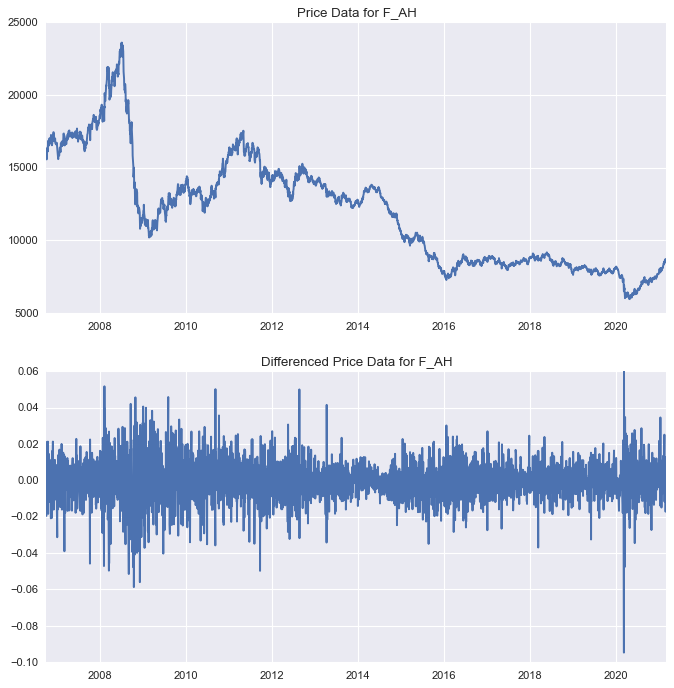

In [33]:

fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (10,10))
plt.style.use('seaborn')

plt.subplot(2, 1, 1)
plt.plot(f.loc['F_AH']['OPEN'])
plt.title('Price Data for F_AH')

plt.subplot(2, 1, 2)
plt.plot(f.loc['F_AH']['OPEN'].pct_change())
plt.title('Differenced Price Data for F_AH')

In [16]:
files['DATE']  = pd.to_datetime(files['DATE'].astype('str'), format = "%Y/%m/%d")

In [193]:
tempcash = files[files['TICKER'] == 'CASH'].drop('DATE', axis = 1)
cash = files[['DATE']].copy().drop_duplicates()

for col in tempcash.columns:
    cash[col] = tempcash[col][0]
    
cash

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO,TICKER
0,1990-01-01,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
1,1990-01-02,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
2,1990-01-03,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
3,1990-01-04,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
4,1990-01-05,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
...,...,...,...,...,...,...,...,...,...,...,...
479691,1998-03-22,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
479748,1998-06-21,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
564314,1989-05-01,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
564397,1989-08-28,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH


In [226]:
files = files[files['TICKER'] != 'CASH']
#files = pd.concat([files[files['TICKER'] != 'CASH'], cash])

In [227]:
files.TICKER.nunique()

88

In [228]:
files = files.sort_values(['DATE','TICKER'])
files['MONTH'] = files.DATE.dt.strftime("%Y-%m")

In [229]:
files

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO,TICKER,MONTH
468527,1982-11-03,114562.5000,114812.500,114562.50,114562.5000,0.0,0.0,0.0,0.0,0.0,F_SS,1982-11
468528,1982-11-05,114425.0000,114612.500,114412.50,114425.0000,0.0,0.0,0.0,0.0,0.0,F_SS,1982-11
468529,1982-11-08,114300.0000,114300.000,114137.50,114300.0000,0.0,0.0,0.0,0.0,0.0,F_SS,1982-11
468530,1982-11-09,114250.0000,114287.500,114212.50,114250.0000,0.0,0.0,0.0,0.0,0.0,F_SS,1982-11
468531,1982-11-10,114400.0000,114450.000,114350.00,114400.0000,0.0,0.0,0.0,0.0,0.0,F_SS,1982-11
...,...,...,...,...,...,...,...,...,...,...,...,...
545681,2021-03-05,27300.0000,28540.000,24900.00,25050.7000,114159.0,136244.0,0.0,0.0,0.0,F_VX,2021-03
553530,2021-03-05,32550.0000,33037.500,32337.50,32650.0000,40759.0,185189.0,0.0,0.0,0.0,F_W,2021-03
558278,2021-03-05,31530.0000,32010.000,31410.00,31540.0000,288.0,14094.0,0.0,0.0,0.0,F_XX,2021-03
564171,2021-03-05,154495.0000,157725.000,153205.00,157510.0000,341008.0,80041.0,0.0,0.0,0.0,F_YM,2021-03


In [230]:
files = files.groupby(['MONTH','TICKER']).mean().reset_index()

In [231]:
files = files[files['MONTH'] >= '2010-01']
dates = files.MONTH.unique()
price = files[['MONTH','CLOSE','TICKER']]

In [261]:
#get best weight 
y ={}
matrices = {}

for i,date in enumerate(dates):
    if i < 10:
        continue
    window = (dates[i-10], date)
    data = price[(price['MONTH'] > window[0]) & (price['MONTH'] < window[1])]
    data = data.pivot('MONTH', 'TICKER')
    data.columns = data.columns.droplevel()
    mu = data.tail(1).iloc[0]
    data = data.drop(data.tail(1).index)
    S = risk_models.sample_cov(data)
    ef = EfficientFrontier(mu, S)
    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    y[date] = cleaned_weights    
    matrices[date] = data

C:\Users\reonh\miniconda3\envs\bt4013\lib\site-packages\pypfopt\risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
C:\Users\reonh\miniconda3\envs\bt4013\lib\site-packages\pypfopt\risk_models.py:87: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn(
C:\Users\reonh\miniconda3\envs\bt4013\lib\site-packages\pypfopt\risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
C:\Users\reonh\miniconda3\envs\bt4013\lib\site-packages\pypfopt\risk_models.py:87: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn(
C:\Users\reonh\miniconda3\envs\bt4013\lib\site-packages\pypfopt\risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
C:\Users\reonh\miniconda3\envs\bt4013\lib\site-packages\pypfopt\risk_models.py:87: UserWarning: Cou

In [127]:
#create train set

train = files[files['DATE'] <= '2021-01-01'].sort_values(['DATE', 'TICKER'])
#train = train[train['DATE'] >= '2000-01-01']

In [233]:
np.array(matrices)

array({'2010-11': TICKER           F_AD          F_AE          F_AH           F_AX  \
MONTH                                                              
2010-02  88461.578947  64195.000000  13135.789474  140041.450000   
2010-03  90542.608696  67571.304348  13260.434783  149393.695652   
2010-04  92042.727273  69997.000000  13478.571429  155725.100000   
2010-05  86664.000000  64886.666667  12704.500000  149045.750000   
2010-06  84605.454545  65518.181818  12565.000000  151905.272727   
2010-07  87303.809524  64934.090909  12765.714286  151933.090909   
2010-08  89733.181818  64979.545455  13270.454545  153237.045455   
2010-09  93224.285714  66841.363636  13727.619048  155552.454545   

TICKER           F_BC          F_BG          F_BO          F_BP           F_C  \
MONTH                                                                           
2010-02  75051.000000  60807.500000  22942.736842  97616.447368  18284.210526   
2010-03  80183.043478  66068.478261  23753.478261  94067.6

In [245]:
X = np.array(list(matrices.values()))

In [244]:
y = np.array(pd.DataFrame(y)).T

In [259]:
Xtrain = X[:100]
ytrain =y[:100]

np.save("X",X)
np.save("y",y)

In [260]:
ypred = np.load("ypred.npy")

In [270]:
list(matrices.values())[0].columns

Index(['F_AD', 'F_AE', 'F_AH', 'F_AX', 'F_BC', 'F_BG', 'F_BO', 'F_BP', 'F_C',
       'F_CA', 'F_CC', 'F_CD', 'F_CF', 'F_CL', 'F_CT', 'F_DL', 'F_DM', 'F_DT',
       'F_DX', 'F_DZ', 'F_EB', 'F_EC', 'F_ED', 'F_ES', 'F_F', 'F_FB', 'F_FC',
       'F_FL', 'F_FM', 'F_FP', 'F_FV', 'F_FY', 'F_GC', 'F_GD', 'F_GS', 'F_GX',
       'F_HG', 'F_HO', 'F_HP', 'F_JY', 'F_KC', 'F_LB', 'F_LC', 'F_LN', 'F_LQ',
       'F_LR', 'F_LU', 'F_LX', 'F_MD', 'F_MP', 'F_ND', 'F_NG', 'F_NQ', 'F_NR',
       'F_NY', 'F_O', 'F_OJ', 'F_PA', 'F_PL', 'F_PQ', 'F_RB', 'F_RF', 'F_RP',
       'F_RR', 'F_RU', 'F_RY', 'F_S', 'F_SB', 'F_SF', 'F_SH', 'F_SI', 'F_SM',
       'F_SS', 'F_SX', 'F_TR', 'F_TU', 'F_TY', 'F_UB', 'F_US', 'F_UZ', 'F_VF',
       'F_VT', 'F_VW', 'F_VX', 'F_W', 'F_XX', 'F_YM', 'F_ZQ'],
      dtype='object', name='TICKER')

In [271]:
res = pd.DataFrame(ypred, list(y.keys())[100:])
res.columns = list(matrices.values())[0].columns

In [273]:
res.to_csv("weights.csv")

In [274]:
res

TICKER,F_AD,F_AE,F_AH,F_AX,F_BC,F_BG,F_BO,F_BP,F_C,F_CA,...,F_US,F_UZ,F_VF,F_VT,F_VW,F_VX,F_W,F_XX,F_YM,F_ZQ
2019-03,0.011819,0.011660,0.010717,0.012240,0.010942,0.011203,0.011727,0.012356,0.011018,0.011564,...,0.011339,0.012044,0.012384,0.012370,0.010697,0.011985,0.010882,0.011838,0.011212,0.011457
2019-04,0.011824,0.011660,0.010716,0.012235,0.010942,0.011200,0.011727,0.012355,0.011022,0.011564,...,0.011339,0.012048,0.012382,0.012366,0.010698,0.011983,0.010886,0.011836,0.011211,0.011459
2019-05,0.011829,0.011659,0.010715,0.012230,0.010943,0.011200,0.011725,0.012353,0.011026,0.011566,...,0.011338,0.012051,0.012378,0.012361,0.010697,0.011979,0.010890,0.011836,0.011208,0.011461
2019-06,0.011833,0.011657,0.010713,0.012228,0.010945,0.011198,0.011725,0.012349,0.011031,0.011566,...,0.011338,0.012052,0.012373,0.012356,0.010696,0.011974,0.010893,0.011834,0.011205,0.011463
2019-07,0.011819,0.011648,0.010733,0.012230,0.010936,0.011217,0.011704,0.012335,0.011032,0.011563,...,0.011348,0.012037,0.012374,0.012339,0.010699,0.011978,0.010897,0.011834,0.011206,0.011454
2019-08,0.011799,0.011630,0.010758,0.012240,0.010922,0.011252,0.011672,0.012321,0.011033,0.011561,...,0.011357,0.012011,0.012376,0.012319,0.010694,0.011984,0.010899,0.011836,0.011197,0.011436
2019-09,0.011778,0.011608,0.010788,0.012262,0.010908,0.011313,0.011632,0.012311,0.011025,0.011559,...,0.011368,0.011989,0.012386,0.012298,0.010682,0.012012,0.010892,0.011840,0.011184,0.011412
2019-10,0.011767,0.011580,0.010815,0.012275,0.010890,0.011376,0.011591,0.012298,0.011022,0.011555,...,0.011378,0.011974,0.012401,0.012265,0.010668,0.012043,0.010887,0.011847,0.011170,0.011398
2019-11,0.011767,0.011557,0.010834,0.012284,0.010878,0.011425,0.011563,0.012281,0.011020,0.011558,...,0.011388,0.011974,0.012411,0.012242,0.010657,0.012062,0.010896,0.011854,0.011152,0.011379
2019-12,0.011768,0.011537,0.010850,0.012292,0.010869,0.011471,0.011540,0.012264,0.011018,0.011562,...,0.011397,0.011975,0.012418,0.012221,0.010646,0.012078,0.010906,0.011861,0.011138,0.011362
